In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import correlate2d

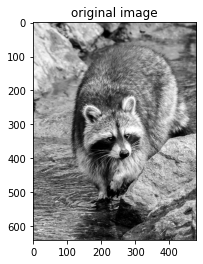

In [55]:
image = cv2.imread('/content/raccoon_dataset/images/raccoon-103.jpg', 0)

plt.title('original image')
plt.imshow(image, cmap='gray')

In [73]:
# We must rescale image's pixels values in range of 0-255
def rescale(img):
    f = img.astype(np.float64)
    f -= f.min()
    f /= f.max()
    return (f*255).astype(np.uint8)

<function matplotlib.pyplot.show>

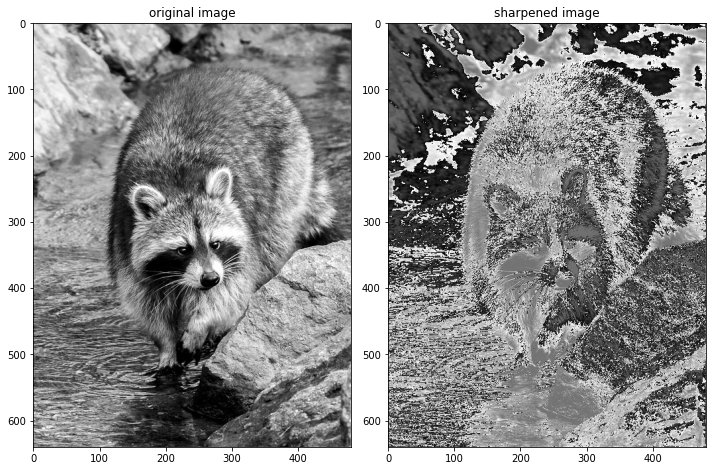

In [77]:
"""
Image Sharpening with Second Derivative Method

"""
# this kernel is our filter kernel to image sharpening, you can change as what you want
kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

filtered_image = correlate2d(image, kernel, mode='same')
filtered_image = rescale(filtered_image)

sharpened_image = image + filtered_image

# Display results
plt.rcParams["figure.figsize"] = [10, 10]

plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('sharpened image')
plt.imshow(sharpened_image, cmap='gray')

plt.show

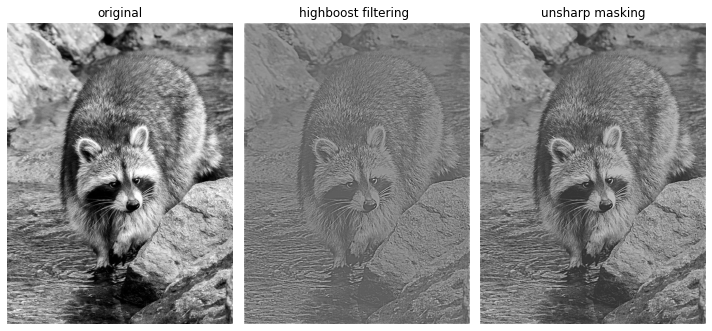

In [78]:
"""
Image Sharpening with Unsharp masking ve high boost filtering

"""
# get the laplacian (seconde derivative) and take away the laplacian from the original image. 
# And then we add the mask to the original image by multiplying it by a certain coefficient.

gauss_kernel = cv2.getGaussianKernel(ksize=7, sigma=4)

# in order to make the kernel two-dimensional, we make a dot product with a transpose
gauss_kernel = np.dot(gauss_kernel, gauss_kernel.T) 

blurred_image = correlate2d(image, gauss_kernel, mode='same')

mask = image - blurred_image

# if coefficient > 1, that is highboost filtering
# if coefficient <= 1, that is unsharp masking

# -> highboost filtering 
coeff_hb = 3

unsharpened_image_hb = rescale(image + (coeff_hb * mask))

# -> unsharp masking
coeff_um = 0.75

unsharpened_image_um = rescale(image + (coeff_um * mask))

# Display results
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].axis('off')
ax[0].title.set_text('original')
ax[0].imshow(image, cmap='gray')

ax[1].axis('off')
ax[1].title.set_text('highboost filtering ')
ax[1].imshow(unsharpened_image_hb, cmap='gray')

ax[2].axis('off')
ax[2].title.set_text('unsharp masking')
ax[2].imshow(unsharpened_image_um, cmap='gray')

plt.show()

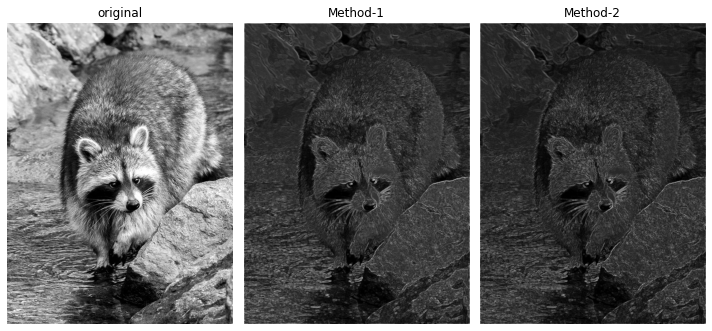

In [81]:
"""
Image Sharpening with First Derivative Method

"""

# there are two types of filters that we will use; sobel-x and sobel-y

sobel_y = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])

sobel_x = sobel_y.T

sobel_x_filter = correlate2d(image, sobel_x, mode='same')
sobel_y_filter = correlate2d(image, sobel_y, mode='same')

# Method-1
method1_image = np.sqrt(sobel_x_filter**2 + sobel_y_filter ** 2)
method1_image = image + method1_image
method1_image = rescale(method1_image)

# Method-2
method2_image = np.absolute(sobel_x_filter) + np.absolute(sobel_y_filter)
method2_image = image + method2_image
method2_image = rescale(method2_image)


# Display results
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].axis('off')
ax[0].title.set_text('original')
ax[0].imshow(image, cmap='gray')

ax[1].axis('off')
ax[1].title.set_text('Method-1')
ax[1].imshow(method1_image, cmap='gray')

ax[2].axis('off')
ax[2].title.set_text('Method-2')
ax[2].imshow(method2_image, cmap='gray')

plt.show()